<a href="https://colab.research.google.com/github/Shuvo3128/BACKBENCHER-/blob/main/Deep_Learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn spacy nltk bs4 matplotlib seaborn wordcloud

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,891,521 (14.84 MB)

 Trainable params: 3,891,521 (14.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 85s 258ms/step - accuracy: 0.6598 - loss: 0.5941 - val_accuracy: 0.8565 - val_loss: 0.3453
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - accuracy: 0.8838 - loss: 0.3087 - val_accuracy: 0.8544 - val_loss: 0.3438
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 81s 251ms/step - accuracy: 0.9217 - loss: 0.2262 - val_accuracy: 0.8540 - val_loss: 0.3688
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 78s 249ms/step - accuracy: 0.9411 - loss: 0.1735 - val_accuracy: 0.8500 - val_loss: 0.4228
775/775 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step

LSTM Performance:
Accuracy:  0.8409
Precision: 0.8414
Recall:    0.8414
F1 Score:  0.8414

Classification Report:
              precision    recall  f1-score   support

           0     0.8404    0.8404    0.8404     12359
           1     0.8414    0.8414    0.8414     12437

    accuracy                         0.8409     24796
   macro avg     0.8409    0.8409    0.8409     24796
weighted avg     0.8409    0.8409    0.8409   

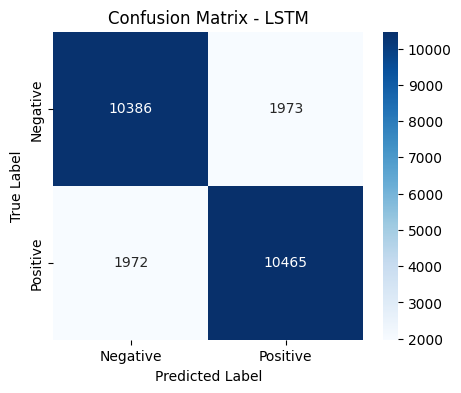

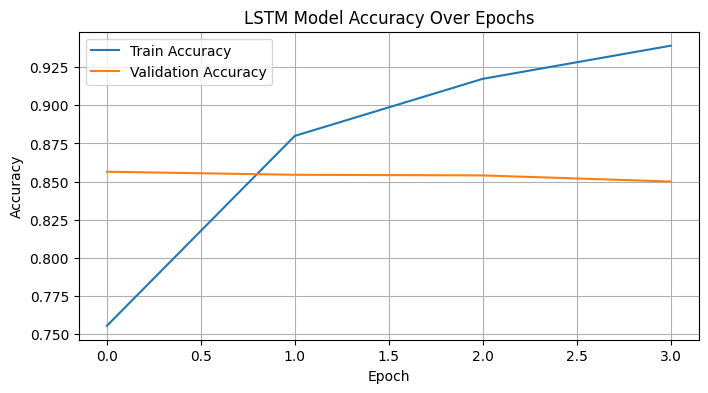

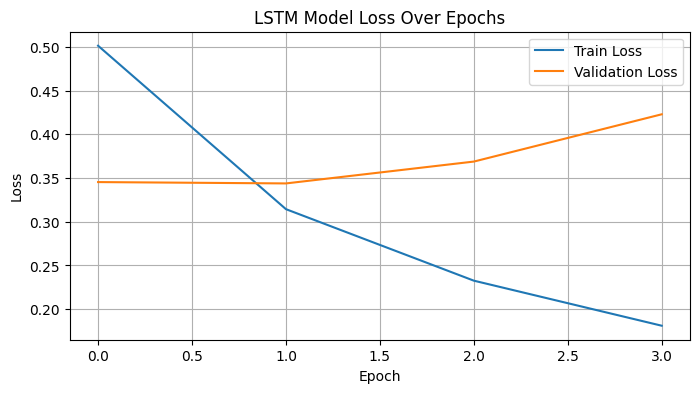

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# =====================
# 1. Load Cleaned Data
# =====================
train_df = pd.read_csv("/content/drive/MyDrive/IMDB_Project/train_clean.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/IMDB_Project/test_clean.csv")

# =====================
# 2. Prepare Text and Labels
# =====================
X_train_text = train_df['review_clean']
X_test_text  = test_df['review_clean']
y_train = train_df['sentiment'].astype(int).values
y_test  = test_df['sentiment'].astype(int).values

# =====================
# 3. Tokenize & Pad Sequences
# =====================
MAX_VOCAB = 30000  # vocabulary size
MAX_LEN = 200      # sequence length

tokenizer = Tokenizer(num_words=MAX_VOCAB)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq  = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_pad  = pad_sequences(X_test_seq, maxlen=MAX_LEN)

# =====================
# 4. Build Optimized LSTM Model
# =====================
model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    LSTM(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4),  # reduced units & higher dropout
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build model explicitly for summary
model.build(input_shape=(None, MAX_LEN))
model.summary()

# =====================
# 5. Early Stopping Callback
# =====================
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# =====================
# 6. Train Model
# =====================
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# =====================
# 7. Evaluate Model
# =====================
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("\nLSTM Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# =====================
# 8. Confusion Matrix
# =====================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix - LSTM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# =====================
# 9. Accuracy & Loss Plots
# =====================
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,942,977 (15.04 MB)

 Trainable params: 3,942,977 (15.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 160s 490ms/step - accuracy: 0.6493 - loss: 0.5951 - val_accuracy: 0.8402 - val_loss: 0.3703
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 203s 494ms/step - accuracy: 0.8844 - loss: 0.3106 - val_accuracy: 0.8474 - val_loss: 0.3693
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 205s 505ms/step - accuracy: 0.9200 - loss: 0.2313 - val_accuracy: 0.8611 - val_loss: 0.3648
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 154s 492ms/step - accuracy: 0.9377 - loss: 0.1822 - val_accuracy: 0.8526 - val_loss: 0.4272
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 204s 498ms/step - accuracy: 0.9568 - loss: 0.1296 - val_accuracy: 0.8448 - val_loss: 0.4795
775/775 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step

BiLSTM Performance:
Accuracy:  0.8381
Precision: 0.8603
Recall:    0.8084
F1 Score:  0.8336

Classification Report:
              precision    recall  f1-score   support

           0     0.8182    0.8680    0.8424     12359
           1     0.8603    0.8084    0.8336     12437

    accuracy    

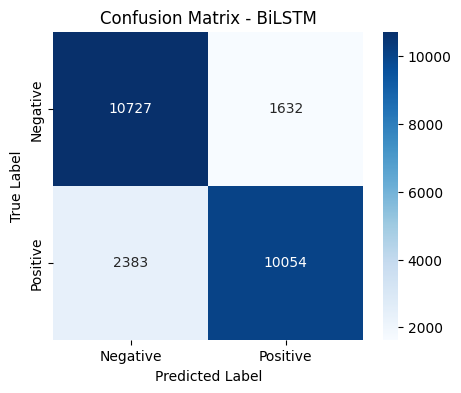

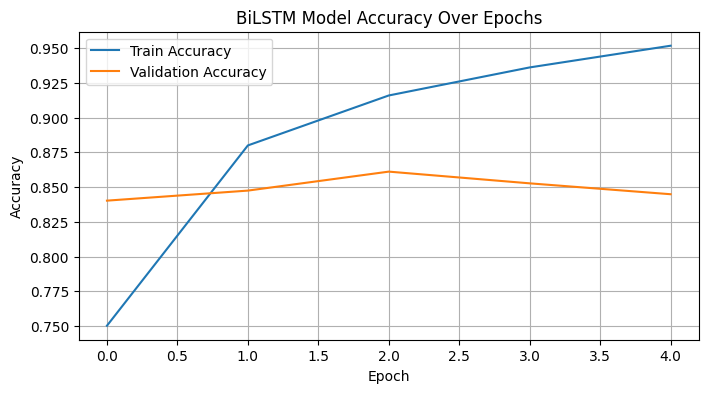

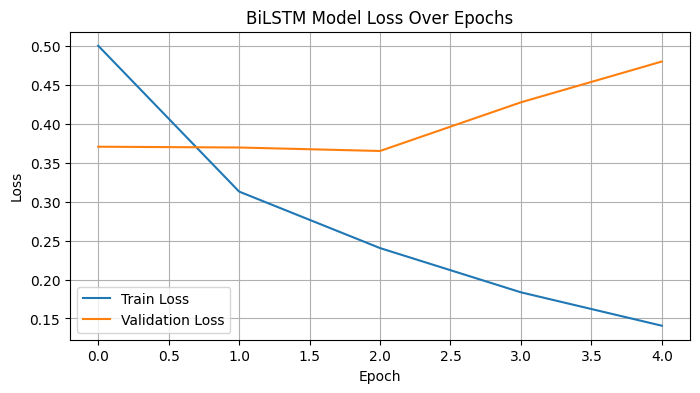

In [ ]:
from tensorflow.keras.layers import Bidirectional

# =====================
# 4. Build BiLSTM Model
# =====================
bilstm_model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

bilstm_model.build(input_shape=(None, MAX_LEN))
bilstm_model.summary()

# =====================
# 6. Train Model (BiLSTM)
# =====================
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

bilstm_history = bilstm_model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# =====================
# 7. Evaluate Model
# =====================
y_pred_prob = bilstm_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("\nBiLSTM Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# =====================
# 8. Confusion Matrix
# =====================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix - BiLSTM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# =====================
# 9. Accuracy & Loss Plots
# =====================
plt.figure(figsize=(8,4))
plt.plot(bilstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('BiLSTM Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(bilstm_history.history['loss'], label='Train Loss')
plt.plot(bilstm_history.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,932,417 (15.00 MB)

 Trainable params: 3,932,417 (15.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step - accuracy: 0.6305 - loss: 0.6123 - val_accuracy: 0.8631 - val_loss: 0.3255
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.9199 - loss: 0.2250 - val_accuracy: 0.8695 - val_loss: 0.3149
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 55s 177ms/step - accuracy: 0.9842 - loss: 0.0640 - val_accuracy: 0.8629 - val_loss: 0.4616
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 76s 159ms/step - accuracy: 0.9960 - loss: 0.0161 - val_accuracy: 0.8713 - val_loss: 0.5296
775/775 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step

CNN Performance:
Accuracy:  0.8586
Precision: 0.9064
Recall:    0.8008
F1 Score:  0.8503

Classification Report:
              precision    recall  f1-score   support

           0     0.8206    0.9167    0.8660     12359
           1     0.9064    0.8008    0.8503     12437

    accuracy                         0.8586     24796
   macro avg     0.8635    0.8588    0.8582     24796
weighted avg     0.8636    0.8586    0.8581    

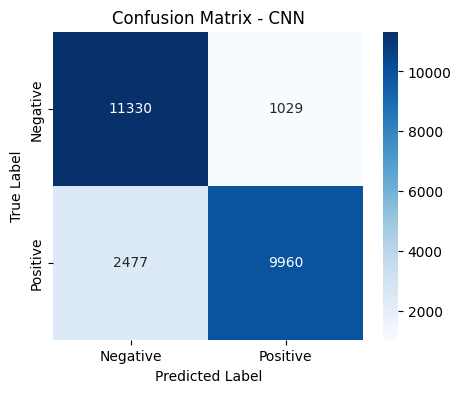

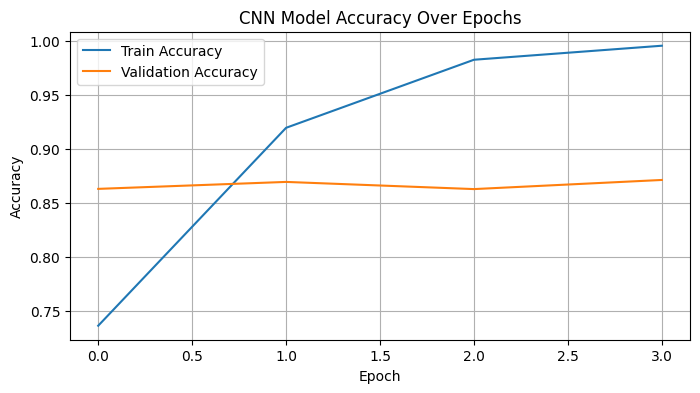

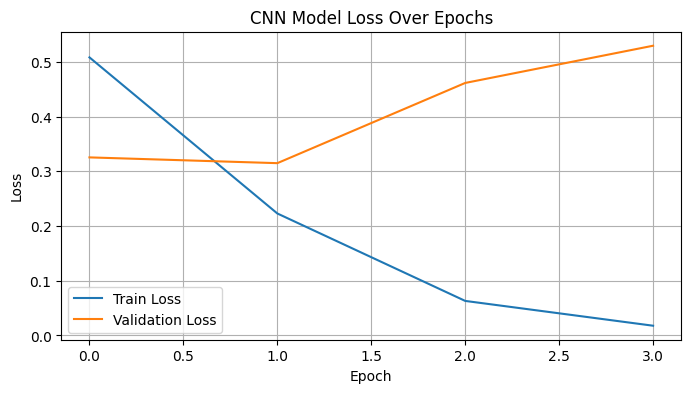

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

# =====================
# 4. Build CNN Model
# =====================
cnn_model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.build(input_shape=(None, MAX_LEN))
cnn_model.summary()

# =====================
# 6. Train Model (CNN)
# =====================
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

cnn_history = cnn_model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# =====================
# 7. Evaluate Model
# =====================
y_pred_prob = cnn_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("\nCNN Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# =====================
# 8. Confusion Matrix
# =====================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix - CNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# =====================
# 9. Accuracy & Loss Plots
# =====================
plt.figure(figsize=(8,4))
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,879,361 (14.80 MB)

 Trainable params: 3,879,361 (14.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 84s 259ms/step - accuracy: 0.6428 - loss: 0.6172 - val_accuracy: 0.7731 - val_loss: 0.4789
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 80s 252ms/step - accuracy: 0.8565 - loss: 0.3562 - val_accuracy: 0.8490 - val_loss: 0.3536
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.9172 - loss: 0.2389 - val_accuracy: 0.8432 - val_loss: 0.3744
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 81s 241ms/step - accuracy: 0.9443 - loss: 0.1682 - val_accuracy: 0.8536 - val_loss: 0.4030
775/775 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step

GRU Performance:
Accuracy:  0.8380
Precision: 0.8084
Recall:    0.8874
F1 Score:  0.8461

Classification Report:
              precision    recall  f1-score   support

           0     0.8744    0.7883    0.8291     12359
           1     0.8084    0.8874    0.8461     12437

    accuracy                         0.8380     24796
   macro avg     0.8414    0.8379    0.8376     24796
weighted avg     0.8413    0.8380    0.8376    

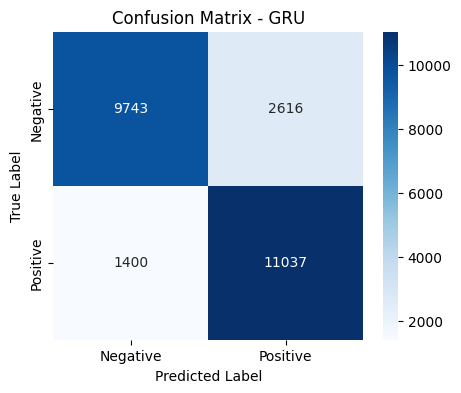

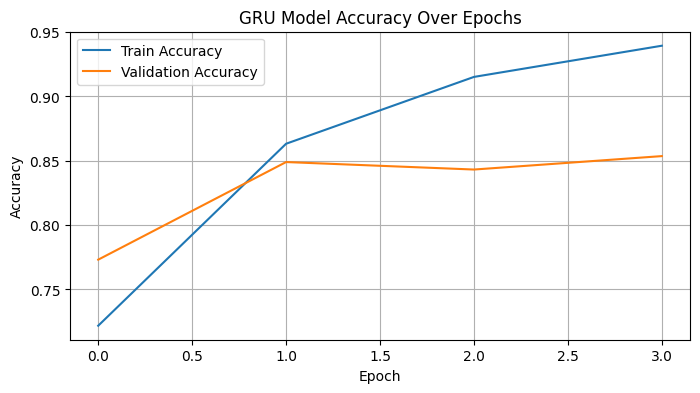

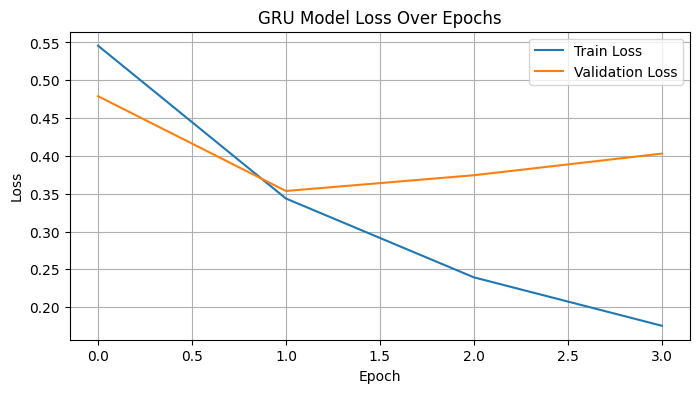

In [ ]:
from tensorflow.keras.layers import GRU

# =====================
# 4. Build GRU Model
# =====================
gru_model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    GRU(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

gru_model.build(input_shape=(None, MAX_LEN))
gru_model.summary()

# =====================
# 6. Train Model (GRU)
# =====================
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

gru_history = gru_model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# =====================
# 7. Evaluate Model
# =====================
y_pred_prob = gru_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("\nGRU Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# =====================
# 8. Confusion Matrix
# =====================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix - GRU')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# =====================
# 9. Accuracy & Loss Plots
# =====================
plt.figure(figsize=(8,4))
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(gru_history.history['loss'], label='Train Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
